# Mohammadreza Taremi  ---  96101902

### First of all, we need to import the useful libraries

In [6]:
#Importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
import math
from scipy.signal import butter, lfilter
sns.set()

### Importing Dataset

In [7]:
dataset = scipy.io.loadmat('All_data.mat')

In [8]:
x_train = dataset['x_train']
y_train = dataset['y_train']
#######
x_test  = dataset['x_test']

### Data Visualization

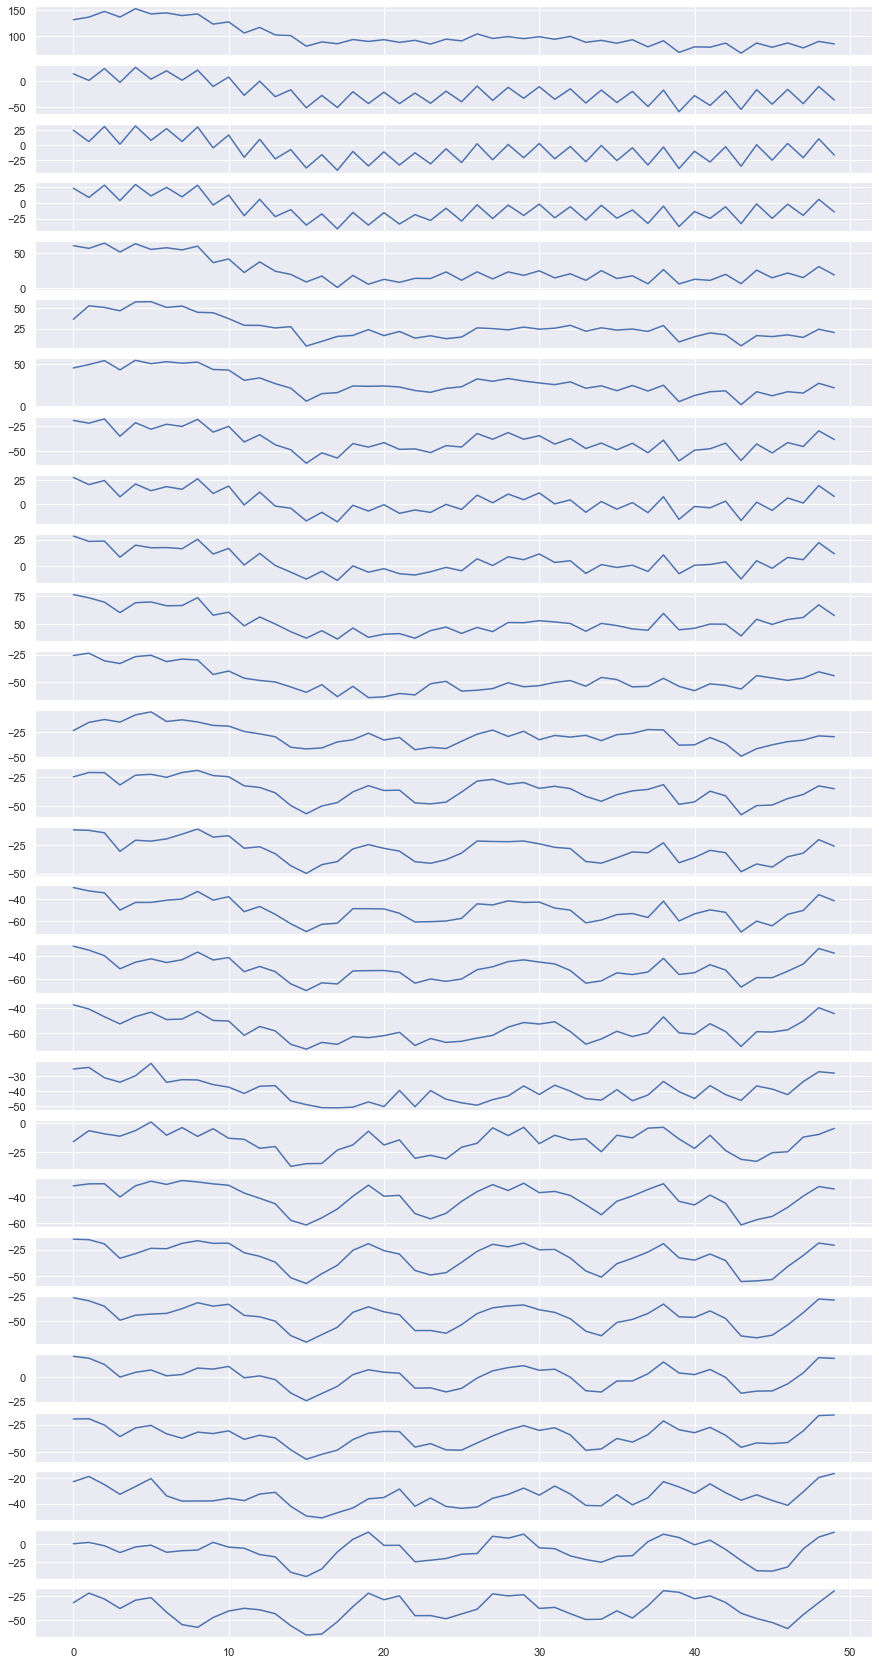

In [27]:
#data visualization
fig, axs = plt.subplots(ncols=1, nrows=28 , figsize=(15,30))
for i in range(28):
    axs[i].plot(x_train[:,i,1])

## Feature Extraction
In this part, we have to extract a couple of features in order to train the classifier. At the first step, we implement statistical features, and frequency based features afterwards.
### 1. Statistical Features
Due to my prior experience in biomedical signal processing, I only chose correlation as a statistical feature for EEG signal.


In [30]:
#Calculating Correlation
def feature_corr(sig_1 , sig_2):
    sig_1_mean = np.mean(sig_1)
    sig_2_mean = np.mean(sig_2)
    sum = 0
    for i in range(len(sig_1)):
        sum += (sig_1[i] - sig_1_mean)*(sig_2[i] - sig_2_mean)
    corr = sum/len(sig_1)
    return corr

#Calculating Correlation Feature Matrix 
def corr_matrix_calc(X):
    no_channel, no_signal = X.shape[1:3]
    corr_mat = np.zeros((no_channel,no_channel,no_signal))
    no_corr_features = int(no_channel*(no_channel - 1)/2)
    corr_feature_matrix = np.zeros((no_signal, no_corr_features))
    for s in range(no_signal):
        for i in range(no_channel):
            for j in range(no_channel):
                corr_mat[i,j,s] = feature_corr(X[:,i,s],X[:,j,s])
    for s in range(no_signal):
        corr_feature_matrix[s] = corr_mat[:,:,s][np.triu_indices(no_channel, k = 1)]
    return corr_feature_matrix

In [32]:
corr_feature_matrix = corr_matrix_calc(x_train)

In [33]:
corr_feature_matrix.shape

(316, 378)

As can be seen, we have computed a matrix with the shape of (316,378). 316 is indicating the number of signals, and 378 is the number of features(correlation of two different signals) such that $a_{ij}$ is correlation coeficient between $i$'th and $j$ 'th signal.

### 2. Frequency Domain Features
In this part, I am going to implement band pass filter to compute the relative energy of power spectrum bands(for 6 bands).

In [34]:
#Filter Design
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [35]:
#Bands
fs = 100
#theta band
lowcut_theta = 2
highcut_theta = 8
#alpha band
lowcut_alpha = 9
highcut_alpha = 15
#beta_1 band
lowcut_beta1 = 16
highcut_beta1 = 22
#beta_2 band
lowcut_beta2 = 23
highcut_beta2 = 29
#gamma_1 band
lowcut_gamma1= 30
highcut_gamma1 = 36
#gamma_2 band
lowcut_gamma2= 37
highcut_gamma2 = 43

Each of the following functions has the responsibilty of computing relative energy of it's corresponding frequnecy band.

In [36]:
def rel_energy_theta(signal):
    no_channel , no_signal = signal.shape[1:3]
    filtered_signal = np.zeros((50,no_channel,no_signal))
    fft_filtered_signal = np.zeros((50,no_channel,no_signal))
    energy_channel = np.zeros((no_signal,no_channel))
    total_energy  = np.zeros(no_signal)
    rel_energy = np.zeros((no_signal,no_channel))
    for s in range(no_signal):
        for c in range(no_channel):
            filtered_signal[:,c,s] = butter_bandpass_filter(signal[:,c,s],lowcut_theta,highcut_theta, fs, order=5)
            fft_filtered_signal[:,c,s] = np.abs(np.fft.fft(filtered_signal[:,c,s]))
            energy_channel[s,c] = np.sum(np.power(fft_filtered_signal[:,c,s],2))
        total_energy[s] = np.sum(np.power(fft_filtered_signal,2))
        rel_energy[s,:] = energy_channel[s,:]/total_energy[s]
    return rel_energy


def rel_energy_alpha(signal):
    no_channel , no_signal = signal.shape[1:3]
    filtered_signal = np.zeros((50,no_channel,no_signal))
    fft_filtered_signal = np.zeros((50,no_channel,no_signal))
    energy_channel = np.zeros((no_signal,no_channel))
    total_energy  = np.zeros(no_signal)
    rel_energy = np.zeros((no_signal,no_channel))
    for s in range(no_signal):
        for c in range(no_channel):
            filtered_signal[:,c,s] = butter_bandpass_filter(signal[:,c,s],lowcut_alpha,highcut_alpha, fs, order=5)
            fft_filtered_signal[:,c,s] = np.abs(np.fft.fft(filtered_signal[:,c,s]))
            energy_channel[s,c] = np.sum(np.power(fft_filtered_signal[:,c,s],2))
        total_energy[s] = np.sum(np.power(fft_filtered_signal,2))
        rel_energy[s,:] = energy_channel[s,:]/total_energy[s]
    return rel_energy

def rel_energy_beta1(signal):
    no_channel , no_signal = signal.shape[1:3]
    filtered_signal = np.zeros((50,no_channel,no_signal))
    fft_filtered_signal = np.zeros((50,no_channel,no_signal))
    energy_channel = np.zeros((no_signal,no_channel))
    total_energy  = np.zeros(no_signal)
    rel_energy = np.zeros((no_signal,no_channel))
    for s in range(no_signal):
        for c in range(no_channel):
            filtered_signal[:,c,s] = butter_bandpass_filter(signal[:,c,s],lowcut_beta1,highcut_beta1, fs, order=5)
            fft_filtered_signal[:,c,s] = np.abs(np.fft.fft(filtered_signal[:,c,s]))
            energy_channel[s,c] = np.sum(np.power(fft_filtered_signal[:,c,s],2))
        total_energy[s] = np.sum(np.power(fft_filtered_signal,2))
        rel_energy[s,:] = energy_channel[s,:]/total_energy[s]
    return rel_energy

def rel_energy_beta2(signal):
    no_channel , no_signal = signal.shape[1:3]
    filtered_signal = np.zeros((50,no_channel,no_signal))
    fft_filtered_signal = np.zeros((50,no_channel,no_signal))
    energy_channel = np.zeros((no_signal,no_channel))
    total_energy  = np.zeros(no_signal)
    rel_energy = np.zeros((no_signal,no_channel))
    for s in range(no_signal):
        for c in range(no_channel):
            filtered_signal[:,c,s] = butter_bandpass_filter(signal[:,c,s],lowcut_beta2,highcut_beta2, fs, order=5)
            fft_filtered_signal[:,c,s] = np.abs(np.fft.fft(filtered_signal[:,c,s]))
            energy_channel[s,c] = np.sum(np.power(fft_filtered_signal[:,c,s],2))
        total_energy[s] = np.sum(np.power(fft_filtered_signal,2))
        rel_energy[s,:] = energy_channel[s,:]/total_energy[s]
    return rel_energy

def rel_energy_gamma1(signal):
    no_channel , no_signal = signal.shape[1:3]
    filtered_signal = np.zeros((50,no_channel,no_signal))
    fft_filtered_signal = np.zeros((50,no_channel,no_signal))
    energy_channel = np.zeros((no_signal,no_channel))
    total_energy  = np.zeros(no_signal)
    rel_energy = np.zeros((no_signal,no_channel))
    for s in range(no_signal):
        for c in range(no_channel):
            filtered_signal[:,c,s] = butter_bandpass_filter(signal[:,c,s],lowcut_gamma1,highcut_gamma1, fs, order=5)
            fft_filtered_signal[:,c,s] = np.abs(np.fft.fft(filtered_signal[:,c,s]))
            energy_channel[s,c] = np.sum(np.power(fft_filtered_signal[:,c,s],2))
        total_energy[s] = np.sum(np.power(fft_filtered_signal,2))
        rel_energy[s,:] = energy_channel[s,:]/total_energy[s]
    return rel_energy

def rel_energy_gamma2(signal):
    no_channel , no_signal = signal.shape[1:3]
    filtered_signal = np.zeros((50,no_channel,no_signal))
    fft_filtered_signal = np.zeros((50,no_channel,no_signal))
    energy_channel = np.zeros((no_signal,no_channel))
    total_energy  = np.zeros(no_signal)
    rel_energy = np.zeros((no_signal,no_channel))
    for s in range(no_signal):
        for c in range(no_channel):
            filtered_signal[:,c,s] = butter_bandpass_filter(signal[:,c,s],lowcut_gamma2,highcut_gamma2, fs, order=5)
            fft_filtered_signal[:,c,s] = np.abs(np.fft.fft(filtered_signal[:,c,s]))
            energy_channel[s,c] = np.sum(np.power(fft_filtered_signal[:,c,s],2))
        total_energy[s] = np.sum(np.power(fft_filtered_signal,2))
        rel_energy[s,:] = energy_channel[s,:]/total_energy[s]
    return rel_energy

In [43]:
def freq_calc(X):
    return rel_energy_theta(X),rel_energy_alpha(X),rel_energy_beta1(X),rel_energy_beta2(X),rel_energy_gamma1(X),rel_energy_gamma2(X)

Now that we have computed the relative energy, we can concatenate the statistical feature, correlation, with the relative energy of the channels

In [44]:
def feature_matrix_concat(X):
    rel_theta, rel_alpha, rel_beta1, rel_beta2, rel_gamma1, rel_gamma2 = freq_calc(X)
    feature_matrix = np.concatenate((corr_matrix_calc(X),rel_theta,rel_alpha,rel_beta1,rel_beta2,rel_gamma1,rel_gamma2), axis=1)
    return feature_matrix

In [45]:
feature_matrix = feature_matrix_concat(x_train)
feature_matrix_test = feature_matrix_concat(x_test)

From the previous part, we know that each of the signals has 378 correlation features. From this part, we figured out that each of the signals has 28 $\times$ 5 = 168 relative energy feature. Therefore we expect a feature matrix with the size of 378 + 168 = 576. To make sure about this conclusion I fetched the shape of feature_matrix:

In [46]:
feature_matrix.shape

(316, 546)

In [47]:
feature_matrix

array([[1.34851780e+02, 1.53651560e+02, 1.47363276e+02, ...,
        1.86142401e-02, 5.02185387e-03, 1.38476749e-02],
       [4.20937320e+02, 3.47652120e+02, 3.39949840e+02, ...,
        7.22894581e-03, 1.00281082e-02, 1.80769873e-02],
       [1.37702984e+02, 1.83481456e+02, 1.50037336e+02, ...,
        2.61192376e-03, 4.42816044e-03, 9.85043702e-03],
       ...,
       [1.83900680e+02, 1.82354040e+02, 1.79286360e+02, ...,
        7.01189419e-05, 1.11452817e-04, 7.32791272e-05],
       [3.81275692e+02, 4.25155460e+02, 4.01838544e+02, ...,
        6.07747425e-05, 7.71449380e-05, 4.31368126e-05],
       [3.95499360e+01, 5.85997560e+01, 5.62239680e+01, ...,
        2.56293746e-04, 3.40393641e-04, 3.29429579e-04]])

# Phase 1
In this part, to tackle the feature dominance issue we need to perfrom a normalization on matrix of features.

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_matrix = scaler.fit_transform(feature_matrix)
feature_matrix_test = scaler.fit_transform(feature_matrix_test)

### Feature Selection
Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [81]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(feature_matrix , y_train.ravel())
feature_importances = pd.Series(ranks)

In [82]:
feature_importances

0      190
1      184
2      197
3      260
4      179
      ... 
541     77
542    139
543     14
544      2
545    163
Length: 546, dtype: int32

The series above demonstrates the indices of the features which possess the higher importance compared to the others. For example the $207'th$ feature is the most important one. In the next step, we have to select the number of features which we desire. For the begining I chose the first 200 features

In [83]:
idx = list(feature_importances[0:200])
feature_matrix_new = feature_matrix[:,idx]
feature_matrix_test_new = feature_matrix_test[:,idx]
feature_matrix_new.shape ,feature_matrix_test_new.shape

((316, 200), (100, 200))

### Defining The Model (MLP)

Now it's time to create our model. Since we have 100 input features, I am going to build a model with the first layer of size 100 neurons and $ReLU$ activation function, a second layer(hidden layer) with 50 neurons and a single neuron as last layer with $sigmoid$ activation function.

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [53]:
#Model Creation

model = Sequential()

#first layer
model.add(Dense(100, activation ='relu'))

#hidden layer
model.add(Dense(50, activation='relu'))

#binary classification
model.add(Dense(1, activation='sigmoid'))

#compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Cross Validation

To test the accuracy of the model, we need to perform 5-fold cross validation to see how the model performs.

In [69]:
from sklearn.model_selection import StratifiedKFold
seed = 101
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
y = y_train.ravel()
for train, test in kfold.split(feature_matrix_new, y):
    # Fit the model
    model.fit(feature_matrix_new[train], y[train], epochs=200, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(feature_matrix_new[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 96.88%
accuracy: 98.41%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 98.41%
98.74% (+/- 1.17%)


As can be seen from the above results, the average accuracy for 5 folds is 98%

In [76]:
y_pred_train = model.predict_classes(feature_matrix_new)
with open('Best_MLP_Train_Labels.txt', 'w') as f:
    for item in y_pred_train:
        f.write("%s\n" % item)

### Predicting Labels for Test Set Using MLP
First of all, we need to consider the feature matrix of test set. From previous parts, we have calculated this matrix. Therefore We just have to predict the labels of the traind model(MLP model).

In [87]:
y_pred_test = model.predict_classes(feature_matrix_test_new)
with open('Best_MLP_Test_Labels.txt', 'w') as f:
    for item in y_pred_train:
        f.write("%s\n" % item)

### Defining The Model (RBF) + 5-Fold Cross Validation
First of all, we need to create a custom layer in order to implement RBF network

In [88]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [89]:
model_rbf = Sequential()

model_rbf.add(Dense(100))
model_rbf.add(RBFLayer(50, 0.5))
model_rbf.add(Dense(1, activation='sigmoid', name='foo'))

model_rbf.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [90]:
for train, test in kfold.split(feature_matrix_new, y):
    # Fit the model
    model_rbf.fit(feature_matrix_new[train], y[train], epochs=200, batch_size=10, verbose=0)
    # evaluate the model
    scores = model_rbf.evaluate(feature_matrix_new[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model_rbf.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 53.12%
accuracy: 74.60%
accuracy: 65.08%
accuracy: 66.67%
accuracy: 76.19%
82.94% (+/- 16.86%)


As can be seen from the above results, the average accuracy for 5 folds is 82%

In [91]:
y_pred_train_RBF = model_rbf.predict_classes(feature_matrix_new)
with open('Best_RBF_Train_Labels.txt', 'w') as f:
    for item in y_pred_train_RBF:
        f.write("%s\n" % item)

### Predicting Labels for Test Set Using RBF
First of all, we need to consider the feature matrix of test set. From previous parts, we have calculated this matrix. Therefore We just have to predict the labels of the traind model(RBF model).

In [92]:
y_pred_test_RBF = model_rbf.predict_classes(feature_matrix_test_new)
with open('Best_RBF_Test_Labels.txt', 'w') as f:
    for item in y_pred_test_RBF:
        f.write("%s\n" % item)

# Phase 2
In this part, we have to select the best features by exploiting evoloutionary algorithms. The rest of the procedure is the same as before.


### Population Generation
First of all, we need to create our first population of features. To do so, we generate a random vector of features indices 
and then select the corresponding features as first population.

In [93]:
import random
def population_generation(feature_matrix, pop_size, no_features): 
    idx_len = feature_matrix.shape[1]
    population = np.zeros((feature_matrix.shape[0],no_features,pop_size))
    for i in range(pop_size):
        idx = random.sample(range(0, idx_len), no_features)
        population[:,0:no_features,i] = feature_matrix[:,idx]
    return population

In [94]:
sample_population = population_generation(feature_matrix ,100,200)
sample_population.shape

(316, 200, 100)

In [95]:
import numpy as np
from scipy.sparse import *
from skfeature.utility.construct_W import construct_W

def fisher(X, y):
    # Construct weight matrix W in a fisherScore way
    kwargs = {"neighbor_mode": "supervised", "fisher_score": True, 'y': y}
    W = construct_W(X, **kwargs)

    # build the diagonal D matrix from affinity matrix W
    D = np.array(W.sum(axis=1))
    L = W
    tmp = np.dot(np.transpose(D), X)
    D = diags(np.transpose(D), [0])
    Xt = np.transpose(X)
    t1 = np.transpose(np.dot(Xt, D.todense()))
    t2 = np.transpose(np.dot(Xt, L.todense()))
    # compute the numerator of Lr
    D_prime = np.sum(np.multiply(t1, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # compute the denominator of Lr
    L_prime = np.sum(np.multiply(t2, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # avoid the denominator of Lr to be 0
    D_prime[D_prime < 1e-12] = 10000
    lap_score = 1 - np.array(np.multiply(L_prime, 1/D_prime))[0, :]

    # compute fisher score from laplacian score, where fisher_score = 1/lap_score - 1
    score = 1.0/lap_score - 1
    return np.transpose(score)

### Fitness Function
Now it's time to perform a match among the genotypes. I created a population in which every individual has the same structure as a feature matrix. In other words, every individual consists of 361 rows, and 200 randmoly selected features as columns. After creating this initial population, we split it into half in which each section possess half of the individuals which belonged to the initial population. Finally, based on the summation of fisher scores over the features used in individuals we select the most fit child and transfer it to the new generation. 

In [96]:
import random
def fitness(population):
    no_signal, no_features , no_indiv = population.shape[0:3]
    half_population= int(no_indiv/2)
    #The new populations are half the previous population
    sub_population1 = population[:,:,0:half_population]
    sub_population2 = population[:,:,half_population:no_indiv]
    new_population = np.zeros((no_signal,no_features,half_population))
    for i in range(half_population):
        if (np.sum(fisher(sub_population1[:,:,i],y_train.ravel()))>np.sum(fisher(sub_population2[:,:,i],y_train.ravel()))):
            new_population[:,:,i] = sub_population1[:,:,i]
        else :
            new_population[:,:,i] = sub_population2[:,:,i]
    return new_population

### One Point Crossover
In the crossover phase, we combine two chromosomes to get a better chromosome (solution). There are lots of ways to implement crossover. For this problem, I used the following method:

Take two chromosomes as input. Generate a random 'index'. The resulting chromosome consists of genes from chromosome1 from 0 up until 'index' and genes from chromosome2 from 'index+1' until the end. Another chromosome is generated by swapping chromosome1 and chromosome2 and doint the same procedure. 

In [97]:
def crossover(parent1, parent2):
    index = np.random.randint(200)
    child1 = np.concatenate((parent1[:,0:index], parent2[:,index:200]) , axis=1)
    child2 = np.concatenate((parent2[:,0:index], parent1[:,index:200]) , axis=1)
    return child1, child2

### Mutation
In the mutation part of this problem, we take chromosomes coming out of Crossover and change them slightly in the hope of getting better. There are many ways to implement mutation. I used the following approach:

Generate a random index, and replace a random column with a feature in original feature matrix corrsponding the generated index.

In [98]:
def mutation(chromosme,probability=0.05):
    index = np.random.randint(200)
    if (random.uniform(0,1)>probability):
        chromosme[:,np.random.randint(200)] = feature_matrix[:,index]
    return chromosme

### Main Algorithm
Now it's time to implement the main algorithm.

In [99]:
def genetic_algorithm(mutation_probability=0.05,pop_size=50,max_generation=50):
    #first of all we initialize the population
    population = population_generation(feature_matrix,pop_size,200)
    best_solution = population[:,:,0]
    best_cost = np.sum(fisher(best_solution,y_train.ravel()))
    sub_populations = np.zeros((316,200,50))
    #implementation of iterations
    for gen in range(max_generation):
        #selection of population
        selected_population = fitness(population)
        for j in range(0,selected_population.shape[2]-1,2):
            #crossover 
            sub_populations[:,:,j],sub_populations[:,:,j+1] = crossover(selected_population[:,:,j],selected_population[:,:,j+1])
            
        for i in range(int(pop_size/2)):
            #mutation
            sub_populations[:,:,j]=mutation(sub_populations[:,:,j],mutation_probability)
            
        for k in range(int(pop_size/2)):
            #fisher score comparison
            if(np.sum(fisher(sub_populations[:,:,j],y_train.ravel())) > best_cost):
                best_solution = sub_populations[:,:,j]
    best_solution = best_solution
    return best_solution

In [100]:
feature_matrix_train_gen = genetic_algorithm(mutation_probability=0.05,pop_size=50,max_generation=50)
feature_matrix_test_gen = genetic_algorithm(mutation_probability=0.05,pop_size=50,max_generation=50)

### Predicting Labels For Train Set Using MLP & RBF
Now that we have computed the feature matrix of both train and test set using genetic algorithm. We can simply predict the class labels. 

In [101]:
#MLP Model
y_pred_train_genetic_MLP = model.predict_classes(feature_matrix_train_gen)
with open('Best_MLP_Train_Labels_UsingGenetic.txt', 'w') as f:
    for item in y_pred_train_genetic_MLP:
        f.write("%s\n" % item)

In [102]:
#RBF Model
y_pred_train_genetic_RBF = model_rbf.predict_classes(feature_matrix_train_gen)
with open('Best_RBF_Train_Labels_UsingGenetic.txt', 'w') as f:
    for item in y_pred_train_genetic_RBF:
        f.write("%s\n" % item)

### Predicting Labels For Test Set Using MLP & RBF
For test set, we have:

In [103]:
#MLP Model
y_pred_test_genetic_MLP = model.predict_classes(feature_matrix_test_gen)
with open('Best_MLP_Test_Labels_UsingGenetic.txt', 'w') as f:
    for item in y_pred_test_genetic_MLP:
        f.write("%s\n" % item)

In [104]:
#RBF Model
y_pred_test_RBF = model_rbf.predict_classes(feature_matrix_test_gen)
with open('Best_RBF_Test_Labels_UsingGenetic.txt', 'w') as f:
    for item in y_pred_test_RBF:
        f.write("%s\n" % item)